In [26]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from check_lang import lang_checker_langdetect
from functions import *
from Preprocessing import *

# pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
df = pd.read_csv('data/data_sinta_raw_s4_full.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.title = df.title.apply(lambda x : x.lower())

df

,jid,eissn,desc,title,date
0,10000,25803786,Teknologi reproduksi aseksual anemon merupakan...,alih teknologi produksi benih anemon laut sec...,2017-04-28
1,10000,25803786,Kegiatan ini bertujuan untuk meningkatkan kual...,peningkatan kualitas produk olahan sambusaq tu...,2017-04-28
2,10000,25803786,Kegiatan Pengabdian kepada Masyarakat ini dila...,model pemanfaatan urine sapi sebagai pupuk org...,2017-04-28
3,10000,25803786,Sulawesi Selatan khususnya Kabupaten Enrekang ...,penerapan teknologi tepat guna pada pengolahan...,2017-04-28
4,10000,25803786,Kabupaten Sidrap menembus angka 94 kasus HIV-A...,penyuluhan pencegahan dan penularan hiv-aids p...,2017-04-28
...,...,...,...,...,...
348026,9996,26152835,Feline panleukopenia is an infectious disease ...,feline panleucopenia in bengal cats at hasanud...,2023-11-08
348027,9996,26152835,Turtles are reptiles that are very easy to rec...,a case handling bladder stone on the turtle (c...,2024-03-10
348028,9996,26152835,The objective of this study was to see whether...,bentonite addition in quail diet (coturnix-cot...,2024-02-28
348029,9996,26152835,This study aims to determine the histological ...,comparative histology of the skin between sumb...,2024-04-29


In [4]:
selected_eissn = df.eissn.sample().values[-1]
selected_eissn

'2579308X'

In [5]:
# eissn = '25812874' 'Jurnal Biomedik : JBM'

# selected_journal = df[df.eissn == selected_eissn]
selected_journal = df.loc[df.eissn == '2597999X', :]
selected_journal

,jid,eissn,desc,title,date
3860,1036,2597999X,Abstract: Trauma can be defined as a physical ...,penatalaksanaan cairan perioperatif pada kasus...,2013-01-31
3861,1036,2597999X,Abstract: Toxoplasmosis in pregnancy causes th...,toksoplasmosis dalam kehamilan,2013-01-31
3862,1036,2597999X,Abstrak: Polimorfisme apolipoprotein E berhubu...,association of apo e polymorphism with blood p...,2013-01-31
3863,1036,2597999X,Abstrak. Perkiraan saat kematian dihitung mela...,effect of chrysomya domination on calculating ...,2013-01-31
3864,1036,2597999X,Abstrak. Penelitian mengenai suksesi Diptera n...,non-calliphoridae-necrophagous-diptera success...,2013-01-31
...,...,...,...,...,...
4364,1036,2597999X,Abstract: Sensorineural hearing disorder is on...,efektivitas implan koklea pada anak,2022-04-30
4365,1036,2597999X,Abstract:Since the arrival of the COVID-19 vir...,prosedur endoskopi tht-kl di era pandemi covid-19,2022-04-30
4366,1036,2597999X,ABSTRACT: Stroke is an acute neurovascular di...,penggunaan transcranial magnetic stimulation p...,2023-12-06
4367,1036,2597999X,Abstract: Traumatic brain injury is an increas...,gangguan kognitif pasca cedera otak traumatik,2023-12-27


In [6]:
selected_journal['data_cleaned'] = selected_journal.desc.apply(preprocess_text)
selected_journal['data_cleaned'] = selected_journal.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  
selected_journal['lang'] = selected_journal.data_cleaned.apply(lang_checker_langdetect)

selected_journal

C:\Users\rarmn\AppData\Local\Temp\ipykernel_5652\3472491142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal['data_cleaned'] = selected_journal.desc.apply(preprocess_text)
C:\Users\rarmn\AppData\Local\Temp\ipykernel_5652\3472491142.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  selected_journal['data_cleaned'] = selected_journal.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)
C:\Users\rarmn\AppData\Local\Temp\ipykernel_5652\3472491142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a

,jid,eissn,desc,title,date,data_cleaned,lang
3860,1036,2597999X,Abstract: Trauma can be defined as a physical ...,penatalaksanaan cairan perioperatif pada kasus...,2013-01-31,penatalaksanaan cairan perioperatif pada kasus...,id
3861,1036,2597999X,Abstract: Toxoplasmosis in pregnancy causes th...,toksoplasmosis dalam kehamilan,2013-01-31,toksoplasmosis dalam kehamilan toksoplasmosis...,id
3862,1036,2597999X,Abstrak: Polimorfisme apolipoprotein E berhubu...,association of apo e polymorphism with blood p...,2013-01-31,association of apo e polymorphism with blood p...,en
3863,1036,2597999X,Abstrak. Perkiraan saat kematian dihitung mela...,effect of chrysomya domination on calculating ...,2013-01-31,effect of chrysomya domination on calculating ...,en
3864,1036,2597999X,Abstrak. Penelitian mengenai suksesi Diptera n...,non-calliphoridae-necrophagous-diptera success...,2013-01-31,non-calliphoridae-necrophagous-diptera success...,en
...,...,...,...,...,...,...,...
4364,1036,2597999X,Abstract: Sensorineural hearing disorder is on...,efektivitas implan koklea pada anak,2022-04-30,efektivitas implan koklea pada anak gangguan ...,id
4365,1036,2597999X,Abstract:Since the arrival of the COVID-19 vir...,prosedur endoskopi tht-kl di era pandemi covid-19,2022-04-30,prosedur endoskopi tht-kl di era pandemi covid...,id
4366,1036,2597999X,ABSTRACT: Stroke is an acute neurovascular di...,penggunaan transcranial magnetic stimulation p...,2023-12-06,penggunaan transcranial magnetic stimulation p...,id
4367,1036,2597999X,Abstract: Traumatic brain injury is an increas...,gangguan kognitif pasca cedera otak traumatik,2023-12-27,gangguan kognitif pasca cedera otak traumatik ...,id


In [7]:
le = LabelEncoder()
selected_journal['label'] = le.fit_transform(selected_journal.eissn)
selected_journal

C:\Users\rarmn\AppData\Local\Temp\ipykernel_5652\2972708748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal['label'] = le.fit_transform(selected_journal.eissn)


,jid,eissn,desc,title,date,data_cleaned,lang,label
3860,1036,2597999X,Abstract: Trauma can be defined as a physical ...,penatalaksanaan cairan perioperatif pada kasus...,2013-01-31,penatalaksanaan cairan perioperatif pada kasus...,id,0
3861,1036,2597999X,Abstract: Toxoplasmosis in pregnancy causes th...,toksoplasmosis dalam kehamilan,2013-01-31,toksoplasmosis dalam kehamilan toksoplasmosis...,id,0
3862,1036,2597999X,Abstrak: Polimorfisme apolipoprotein E berhubu...,association of apo e polymorphism with blood p...,2013-01-31,association of apo e polymorphism with blood p...,en,0
3863,1036,2597999X,Abstrak. Perkiraan saat kematian dihitung mela...,effect of chrysomya domination on calculating ...,2013-01-31,effect of chrysomya domination on calculating ...,en,0
3864,1036,2597999X,Abstrak. Penelitian mengenai suksesi Diptera n...,non-calliphoridae-necrophagous-diptera success...,2013-01-31,non-calliphoridae-necrophagous-diptera success...,en,0
...,...,...,...,...,...,...,...,...
4364,1036,2597999X,Abstract: Sensorineural hearing disorder is on...,efektivitas implan koklea pada anak,2022-04-30,efektivitas implan koklea pada anak gangguan ...,id,0
4365,1036,2597999X,Abstract:Since the arrival of the COVID-19 vir...,prosedur endoskopi tht-kl di era pandemi covid-19,2022-04-30,prosedur endoskopi tht-kl di era pandemi covid...,id,0
4366,1036,2597999X,ABSTRACT: Stroke is an acute neurovascular di...,penggunaan transcranial magnetic stimulation p...,2023-12-06,penggunaan transcranial magnetic stimulation p...,id,0
4367,1036,2597999X,Abstract: Traumatic brain injury is an increas...,gangguan kognitif pasca cedera otak traumatik,2023-12-27,gangguan kognitif pasca cedera otak traumatik ...,id,0


In [8]:
tst = selected_journal.sample()[['title', 'desc', 'data_cleaned']]
tst.title.values[-1], tst.desc.values[-1], tst.data_cleaned.values[-1]

('correlation between allenâ€™s and inverse allenâ€™s tests  with diameters of ulnar and radial arteries',
 'Abstrak: Arteri radialis semakin sering dipergunakan sebagai akses alternatif angiografi koroner dan intervensi karena dibanding akses femoralis, komplikasi perdarahan lebih rendah, mobilisasi lebih dini, dan biaya lebih murah. Terdapat beberapa hal yang dapat mengurangi keberhasilan prosedur ini; salah satunya ialah kegagalan pungsi karena ukuran a. radialis yang kecil. Studi sebelumnya menunjukkan bahwa uji Allen dapat digunakan untuk mendeteksi arteri dengan diameter yang lebih besar. Penelitian ini bertujuan untuk mengevaluasi apakah uji Allen dan inverse Allen berkorelasi dengan diameter a. ulnaris dan a. radialis. Penelitian ini berlangsung dari Juli hingga Desember 2012 di Laboratorium Kateterisasi Rumah Sakit Awal Bros Makassar. Pasien menjalani uji Allen dan inverse Allen sebelum prosedur. Ukuran diameter dalam dari lumen arteri radialis dan ulnaris diukur oleh operator

<Axes: xlabel='lang'>

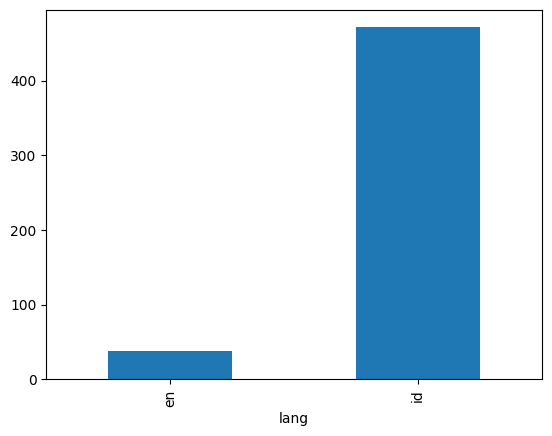

In [9]:
selected_journal.groupby('lang').count().eissn.plot(kind='bar')

In [10]:
model_checkpoint = 'bert-base-cased'
model_checkpoint2 = 'indobenchmark/indobert-base-p1'

selected_journal_en = selected_journal[selected_journal.lang == 'en']
selected_journal_id = selected_journal[selected_journal.lang == 'id']

selected_journal_en.data_cleaned.sample().values[-1], selected_journal_id.data_cleaned.sample().values[-1]

('moving from operative to preventive treatment  in dental caries management  for more than a hundred years blackâs principles of cavity preparation which emphasized âœextension for preventionâ have been widely practiced by dentists â most dentists have believed that dental caries could be controlled by restoring a decayed tooth however drilling and filling only reduce symptoms without eradicating the disease today preservation of a healthy tooth structure must be the main objective of every dental treatment because the process of dental caries and the role of fluoride as an anticaries agent have been understood thus prevention for extension is the appropriate term to replace extension for prevention minimum intervention dentistry midâ is a new approach in managing dental caries which consider identification and preventive treatment first and then restoration with minimal invasive treatment â midâs concept encourages dentistry âœto moveâ from operative surgical to preventive treatment 

In [11]:
# finetuning1 = BertFinetuning(selected_journal_en, model_checkpoint, device, 32)
# finetuning2 = BertFinetuning(selected_journal_id, model_checkpoint2)

In [12]:
embedding_en = embed(selected_journal_en, model_checkpoint, device = device)
embedding_id = embed(selected_journal_id, model_checkpoint2, device = device)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [13]:
# tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
# model = BertClassifierEmbed(1, model_checkpoint)
# model.load_state_dict(torch.load('model/finetuned_pipeline3_bert_2.pt'))

# embedding_w_finetune = embed_with_finetune(selected_journal_en.iloc[0:2], tokenizer, model, device)
# embedding_w_finetune[0]

In [14]:
embedding_en.shape, embedding_id.shape

((38, 256, 768), (471, 256, 768))

In [15]:
embeddings = np.append(embedding_en, embedding_id, axis = 0)
embeddings.shape

(509, 256, 768)

In [16]:
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

X.shape

(509, 2)

Best K: 2


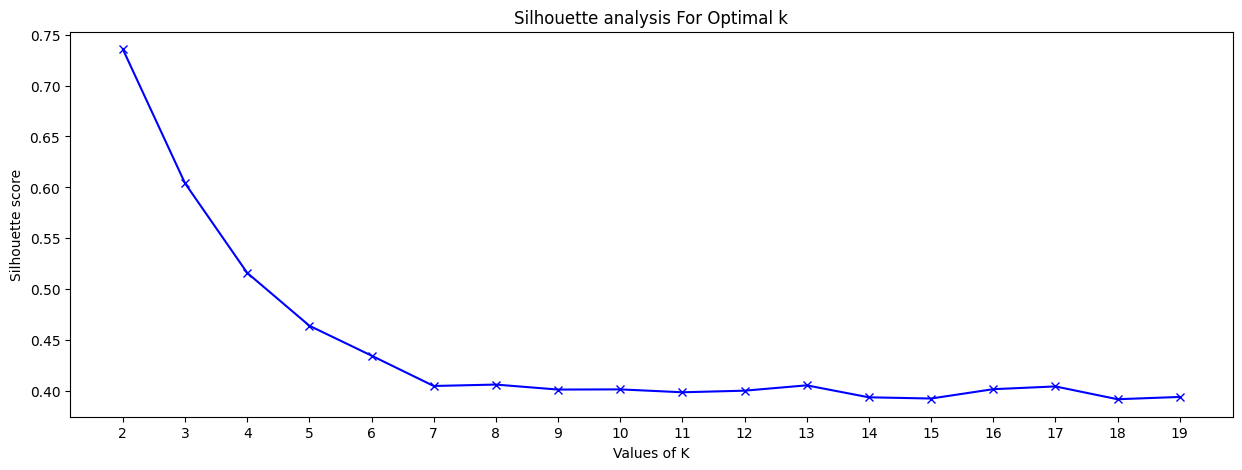

In [17]:
from sklearn.metrics import silhouette_score

def silhouette_method(dataset):
    silhouette_avg = []
    for num_clusters in list(range(2,20)):
        kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", n_init = 10)
        kmeans.fit_predict(dataset)
        score = silhouette_score(dataset, kmeans.labels_)
        silhouette_avg.append(score)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(np.arange(2,20),silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    _ = plt.xticks(np.arange(2,20))

    print (f"Best K: {np.argmax(silhouette_avg)+2}")

    return np.argmax(silhouette_avg)+2

best_n = silhouette_method(X)

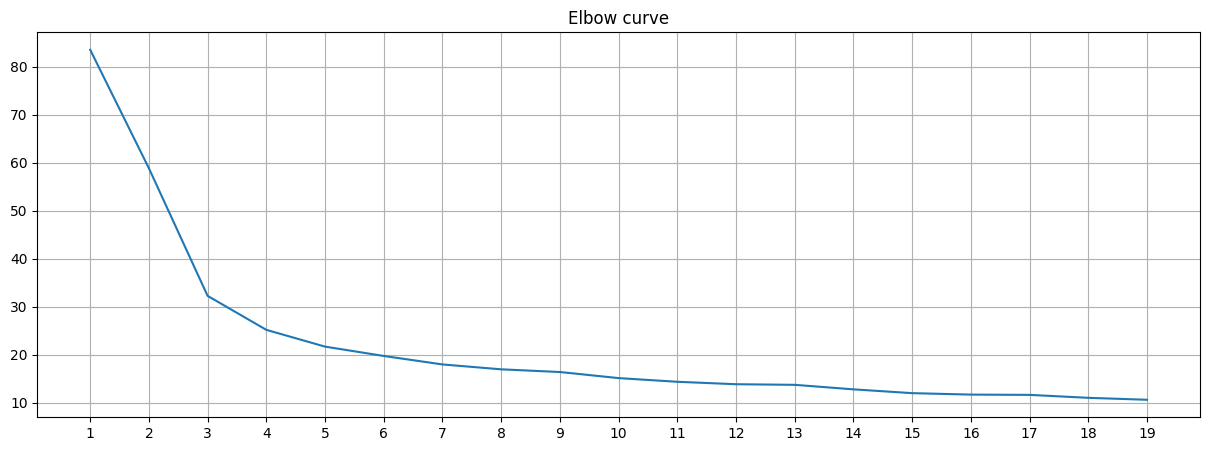

In [18]:
from scipy.spatial.distance import cdist

def elbow_method2(dataset):
    res = list()
    n_cluster = range(1,20)
    for n in n_cluster:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(dataset)
        res.append(np.average(np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1)))

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(1, 20), res)
    plt.xticks(range(1, 20))
    plt.grid(True)
    plt.title('Elbow curve')

elbow_method2(X)

In [19]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

cluster_labels = kmeans.labels_


In [31]:
outscoop_threshold

72.92420058610584

In [32]:
# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = np.array([np.sqrt(np.sum(x - centroids[cluster_labels[i]])**2) for i, x in enumerate(X)])

# Menentukan batas jarak yang dianggap sebagai "outscoop"
outscoop_threshold = np.mean(jarak_ke_centroid) + 2 * np.std(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= outscoop_threshold]
outscoop_data = X[jarak_ke_centroid > outscoop_threshold]

scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

d:\GitHub\Jurnal-Clustering\functions.py:31: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


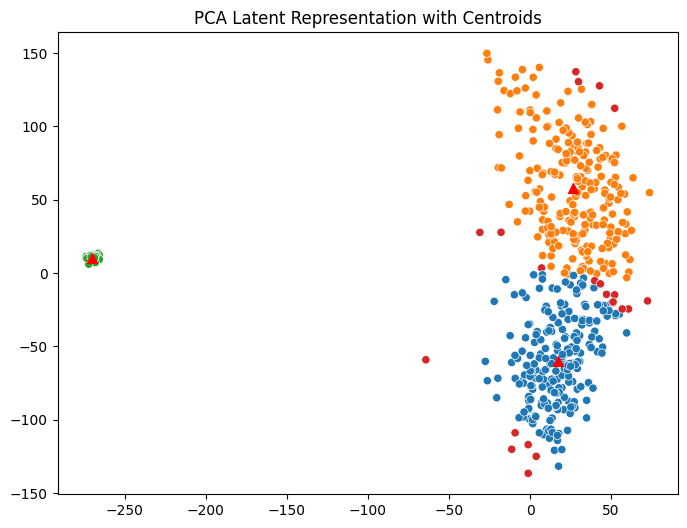

In [21]:
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop=True)

In [22]:
selected_journal_id['scoop'] = scoop_labels[:len(selected_journal_id)]
selected_journal_en['scoop'] = scoop_labels[len(selected_journal_id):]

C:\Users\rarmn\AppData\Local\Temp\ipykernel_5652\340930450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_id['scoop'] = scoop_labels[:len(selected_journal_id)]
C:\Users\rarmn\AppData\Local\Temp\ipykernel_5652\340930450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_en['scoop'] = scoop_labels[len(selected_journal_id):]


In [27]:
jurnal_id = 5
jurnal_type = 'finetuned_sinta'

kmeans_model,  outscoop_threshold, pca_data, X_bert, df_res = load_data(jurnal_id, jurnal_type)


In [29]:
outscoop_threshold

array(139.38281631)

In [23]:
selected_journal_id.groupby('scoop').count().jid, selected_journal_en.groupby('scoop').count().jid

(scoop
 -1.0     20
  1.0    451
 Name: jid, dtype: int64,
 scoop
 -1.0     2
  1.0    36
 Name: jid, dtype: int64)